In [2]:
from Scripts import Trainings
from Scripts import Plotting
from Scripts import Computing_functions
import os
import importlib
import glob
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import xarray as xr
import seaborn as sns
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
OcT = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4']
Var_X1 = ['x', 'y', 'thermalDriving', 'halineDriving', 'iceDraft']
Var_X2 = ['x', 'y', 'temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_non_position_driving = ['thermalDriving', 'halineDriving', 'iceDraft']
Var_X_non_position = ['temperatureYZ', 'salinityYZ', 'iceDraft']
Var_X_BIG = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'Big_T', 'Big_S']
Var_X_Extra = ['iceDraft', 'Slope_iceDraft', 'Slope_bathymetry', 'Distances', 'temperatureYZ', 'salinityYZ']
Var_X_BIG_test = ['iceDraft','Big_T', 'Big_S']
Var_X_BIG_Extra = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'Big_T', 'Big_S',
                  'Distances_ground_line', 'Distances_front_line']

Var_X_slopexy = ['iceDraft', 'bathymetry', 'Slope_iceDraft_x', 'Slope_bathymetry_x',
                   'Slope_iceDraft_y', 'Slope_bathymetry_y', 'temperatureYZ', 'salinityYZ',
                  'Distances_ground_line', 'Distances_front_line']

OcTPlus = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst']
CPLs_test = ['CPL_EXP10_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

ALL_EXP = ['CPL_EXP10_rst','CPL_EXP11_rst', 'CPL_EXP12_rst','CPL_EXP13_rst','CPL_EXP20_rst','CPL_EXP21_rst','CPL_EXP22_rst', 'CPL_EXP23_rst']
Train_oc_exp = ['Ocean1', 'Ocean2', 'Ocean3', 'Ocean4', 'CPL_EXP10_rst','CPL_EXP13_rst', 'CPL_EXP22_rst', 'CPL_EXP23_rst']

NEW = ['IceOcean1r_ElmerIce', 'IceOcean1ra_ElmerIce']
NEW_under100supr = ['IceOcean1r_ElmerIce_under100supr', 'IceOcean1ra_ElmerIce_under100supr']
NEW_fill100 = ['IceOcean1r_ElmerIce_fill100', 'IceOcean1ra_ElmerIce_fill100']
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)

PWD : /home/bouissob/Code
PWD : /home/bouissob/Code


<module 'Scripts.Trainings' from '/home/bouissob/Code/Scripts/Trainings.py'>

Integrated melt rates for Oc1-2-3-4 same graph ## no NN ##


Number of model used : 1
['Ocean1'] : [43.0712307] Gt/yr -1651148156_Ex_                                                   

Number of model used : 1
['Ocean2'] : [8.95181558] Gt/yr -1651148156_Ex_                                                   

Number of model used : 1
['Ocean3'] : [13.56189933] Gt/yr 1651148156_Ex_                                                   

Number of model used : 1
['Ocean4'] : [6.49450106] Gt/yr -1651148156_Ex_                                                   



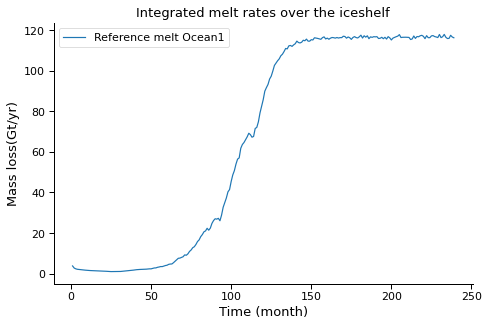

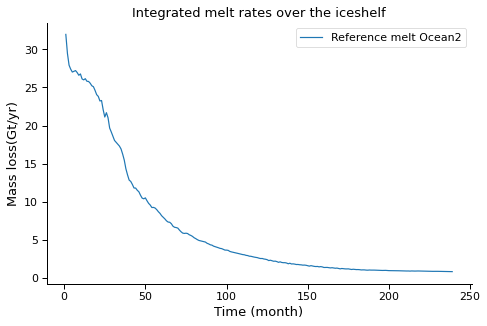

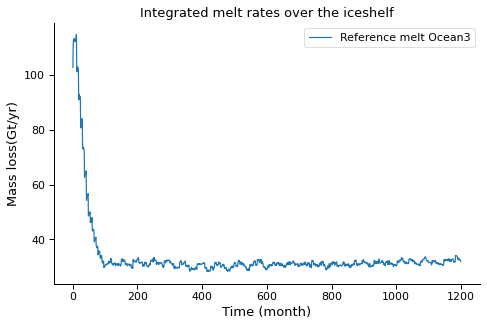

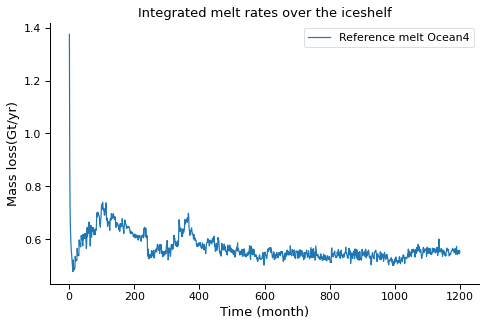

In [3]:
Mod = {'Ocean' : OcT, 'Method_data' : 3}
for oc in OcT:
    RMSE = Plotting.Plot_Melt_time_function(ind = 1,save = False, message = 0, Ocean_target = oc,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', Indep = False, Nothing = True)

Table diff ocean trained with RMSE

Number of model used : 1
['Ocean1'] : [4.37416793] Gt/yr 32_Ch_0-1652775242_Ex_                                                   

Number of model used : 1
['Ocean2'] : [1.67659527] Gt/yr 32_Ch_0-1652775242_Ex_                                                   

Number of model used : 1
['Ocean3'] : [43.61149046] Gt/yr 2_Ch_0-1652775242_Ex_                                                   

Number of model used : 1
['Ocean4'] : [1.11720717] Gt/yr 32_Ch_0-1652775242_Ex_                                                   

Number of model used : 1
['Ocean1'] : [3.08332295] Gt/yr 32_Ch_0-1652775837_Ex_                                                   

Number of model used : 1
['Ocean2'] : [7.38716663] Gt/yr 32_Ch_0-1652775837_Ex_                                                   

Number of model used : 1
['Ocean3'] : [4.28377112] Gt/yr 32_Ch_0-1652775837_Ex_                                                   

Number of model used : 1
['Ocean4'] : [1.00814544] Gt/yr 32_Ch_0-1652775837_

/home/bouissob/Code/Scripts/Plotting.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure()


['Ocean1'] : [464.60239286] Gt/yr 

Number of model used : 1
['Ocean2'] : [27.23560299] Gt/yr 2_Ch_0-1652712989_Ex_                                                   

Number of model used : 1
['Ocean3'] : [122.73815429] Gt/yr _Ch_0-1652712989_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.05389105] Gt/yr 32_Ch_0-1652712989_Ex_                                                   



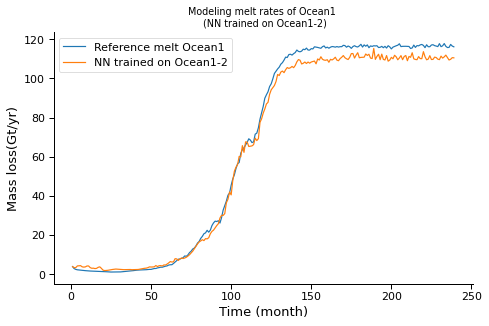

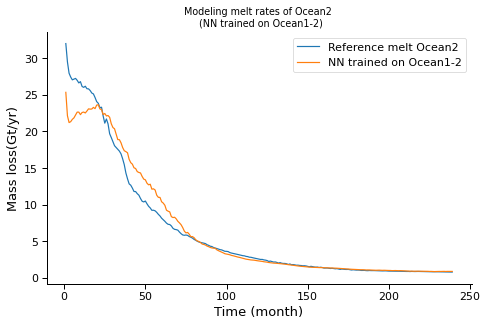

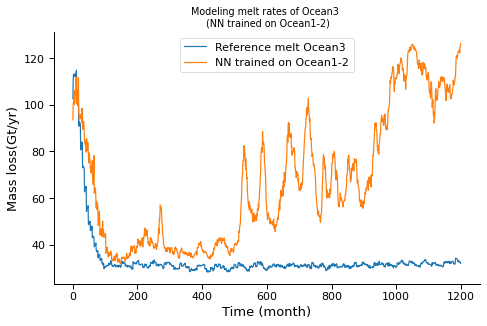

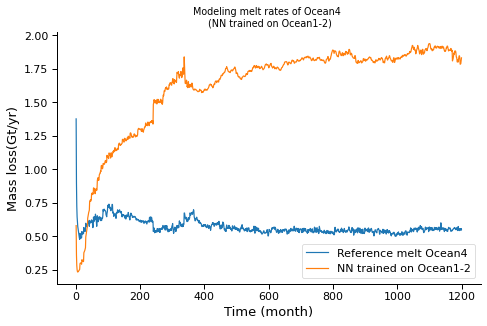

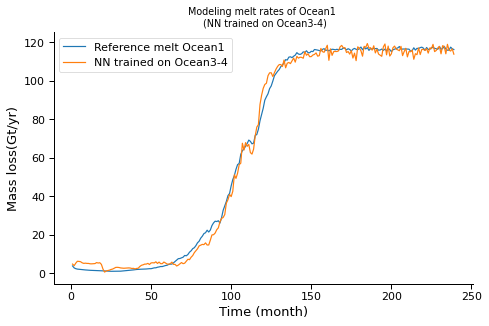

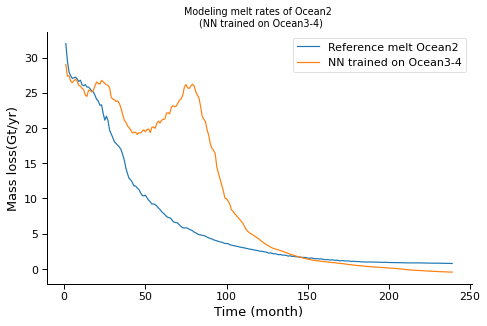

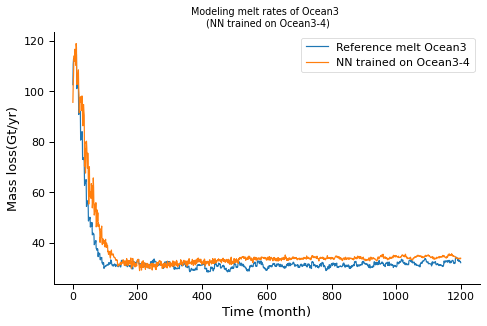

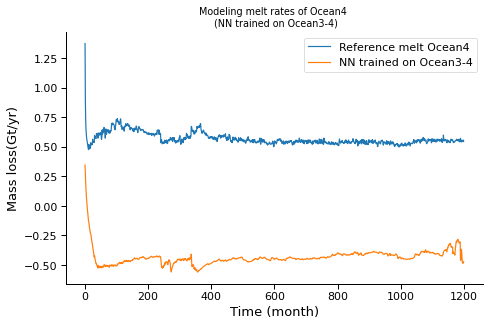

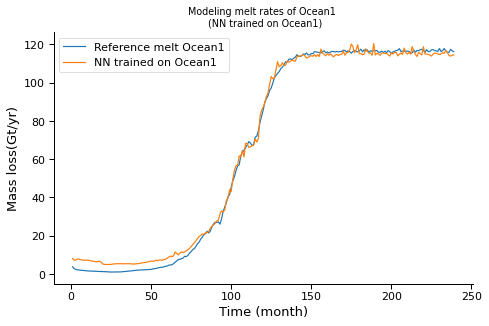

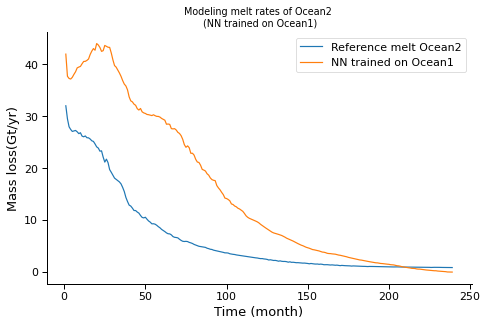

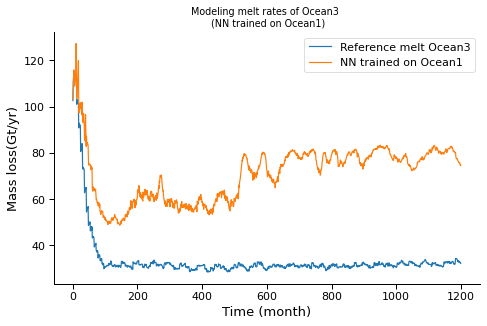

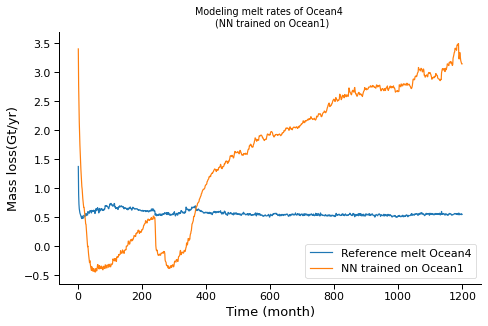

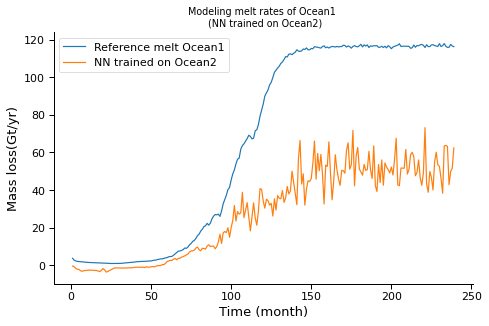

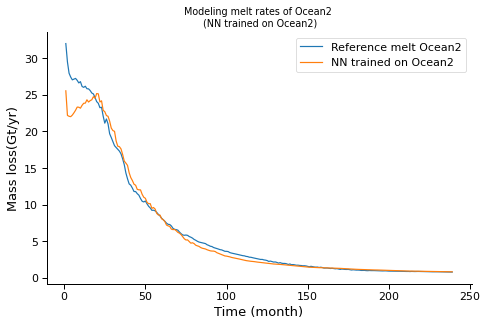

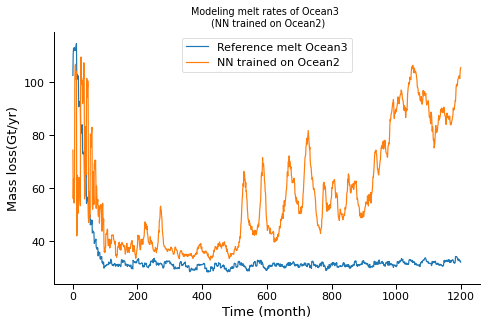

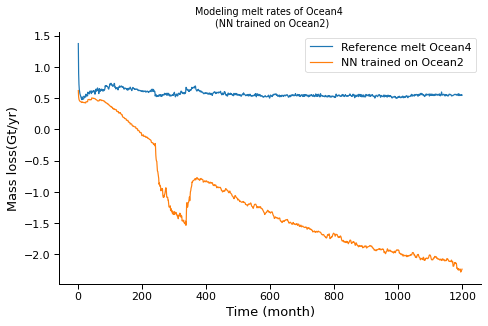

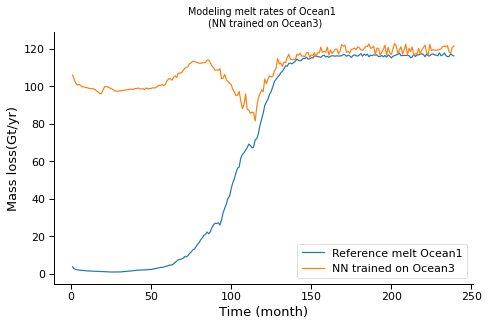

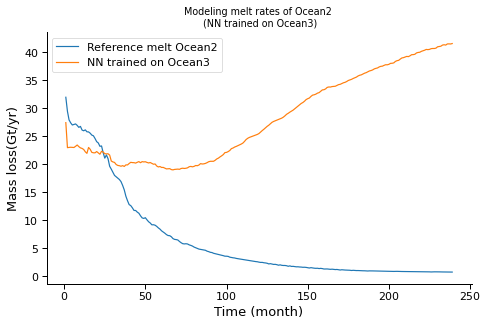

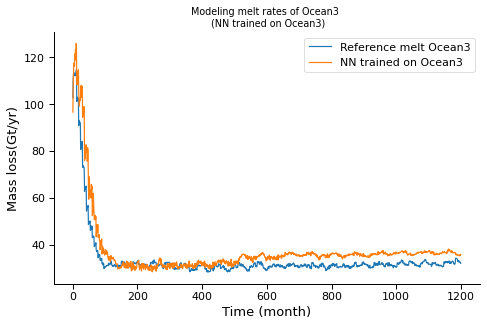

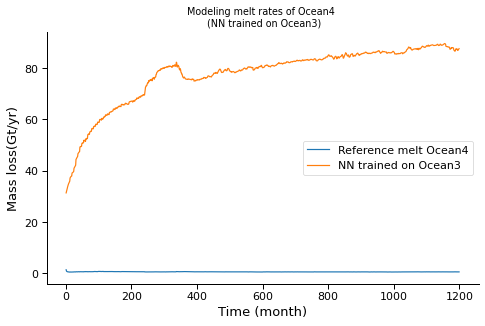

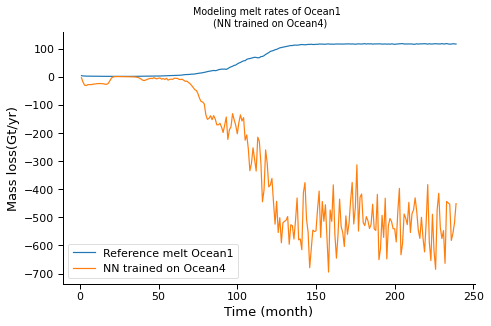

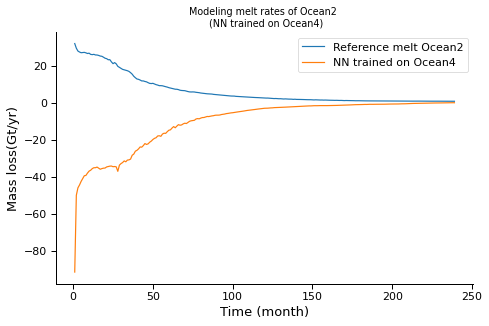

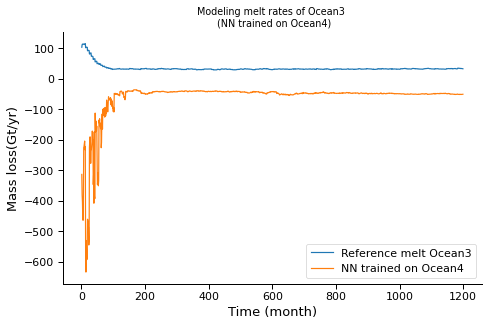

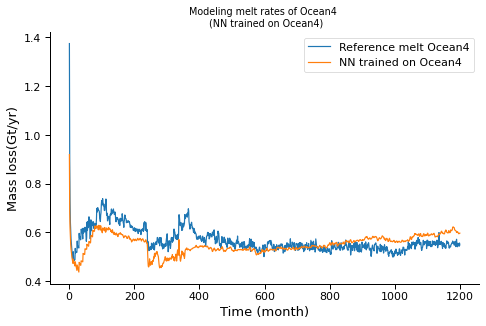

In [5]:
RMSE_ALL = []
All_permut = [['Ocean1', 'Ocean2'], ['Ocean3', 'Ocean4']] + OcT

for OC in All_permut:
    Mod = [{'Ocean' : OC, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}]
    RMSE_cur = []
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
                Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '')
        RMSE_cur.append(RMSE)
    RMSE_ALL.append(RMSE_cur)

Modded to real melt Oc1 vs OcT
Var = Tyz, Syz, iceD

Number of model used : 1


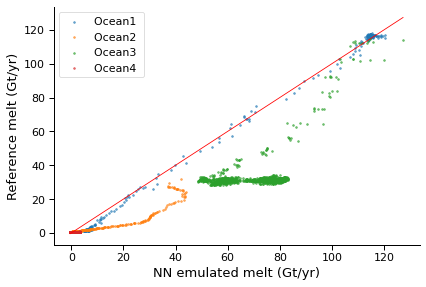

25.414425108421963
Number of model used : 1


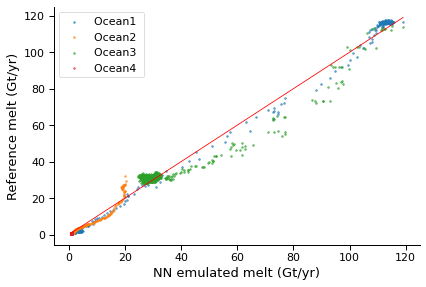

2.7232132711579546


In [11]:
Mod = [{'Ocean' : 'Ocean1', 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0},
        {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 'index' : 0}]
for m in Mod:
    RMSEs, Params, Melts, Modded_melts, Neurs, Oc = Plotting.Plot_Melt_to_Modded_melt(save = True, 
        Save_name = '', message = 0, Ocean_target = OcT, NN_attributes = m, Display_label = False, Display_title = False)


Linear NN vs complex NN RMSE Computing

Number of model used : 1
['Ocean1'] : [3.2203981] Gt/yr _32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean2'] : [2.50126481] Gt/yr 32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean3'] : [3.77720001] Gt/yr 32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean4'] : [0.45457385] Gt/yr 32_Ch_0-1652794247_Ex_                                                   

Number of model used : 1
['Ocean1'] : [36.8995726] Gt/yr -1651149357_Ex_                                                   

Number of model used : 1
['Ocean2'] : [11.39662174] Gt/yr 1651149357_Ex_                                                   

Number of model used : 1
['Ocean3'] : [14.74989244] Gt/yr 1651149357_Ex_                                                   

Number of model used : 1
['Ocean4'] : [8.04999669] Gt/yr -1651149357_Ex_                         

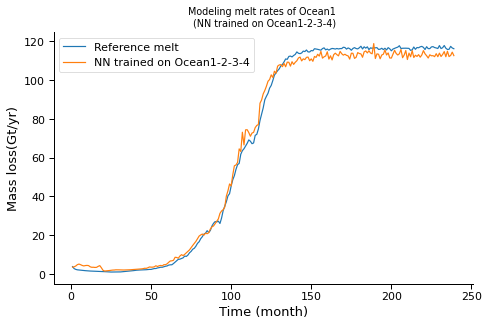

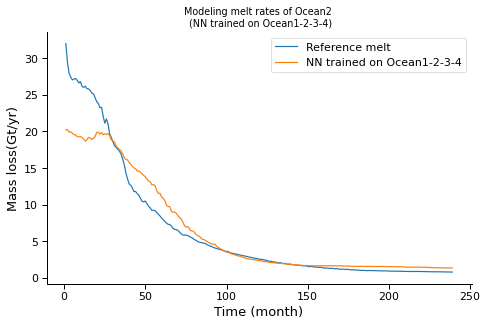

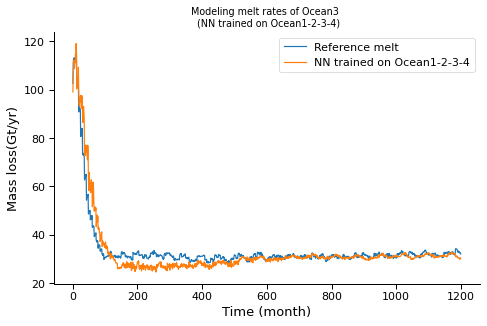

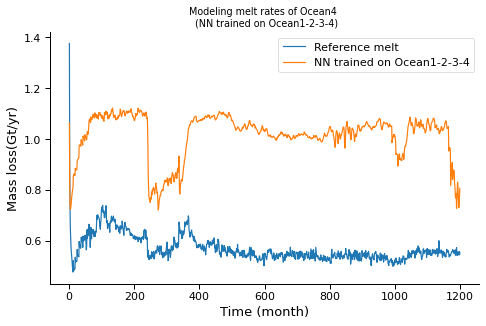

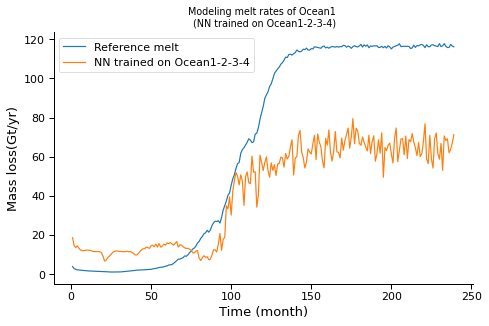

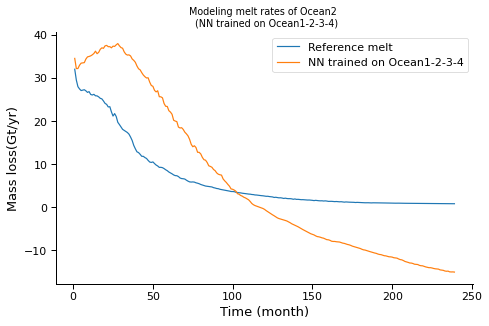

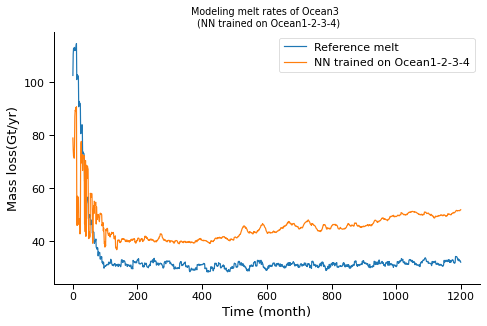

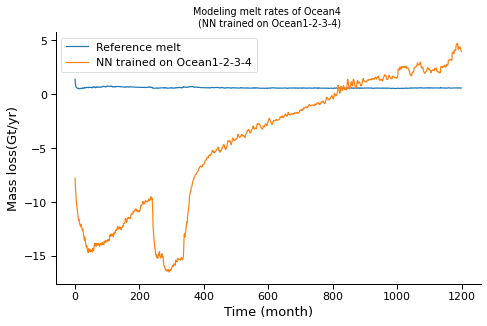

In [4]:
RMSE_ALL = []
Mod = [{'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 32, 
        'index' : 0,  'Var' : Var_X_non_position}, 
       {'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '0', 
        'index' : 0,  'Var' : Var_X_non_position}
      ]

for m in Mod:
    for OC_target in OcT:
        RMSE = Plotting.Plot_Melt_time_function(ind = 0,save = False, message = 0, Ocean_target = OC_target,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = m, Save_name = '')
        RMSE_ALL.append(RMSE)


RMSE with respect to param count log graph type 
Epoch = 8, Var = Tyz, Syz, iceD

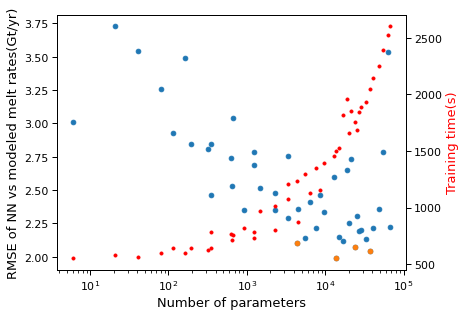

In [64]:
Param, RMSE, Neur, T = Plotting.Plot_total_RMSE_param(save = True, Ocean_target = OcT, message = 0, 
                Time = True, load = True, See_best = True, Axis_type = 'Log')

Simple NN vs regular 32-64-32 NN

In [1]:
Simple_id = 1647887298 #Simple NN
Complex_id = 1652797706 #32-64-32
Mod = [{'Epoch' : 8, 'Ocean' : OcT, 'Method_data' : 3, 'Neur' : '32_64_32', 'Batch_size' : 128, 'Uniq_id' : Complex_id}, 
       {'Epoch' : 8, 'Var' : Var_X_non_position, 'Exact':0, 'Neur' : '0', 'Ocean' : OcT, 'Uniq_id' : Simple_id}]
for oc in OcT:
    RMSE = Plotting.Plot_Melt_time_function(save = False, message = 0, Ocean_target = oc,
            Type_tar = 'COM_NEMO-CNRS', NN_attributes = Mod, Save_name = '', Display_title = False,
            Labels = ['Complex NN', 'Linear NN'])

NameError: name 'OcT' is not defined

Overfit quest graph loss

Ep_64_N_32_32_96_96_Ch_0-1652738557_Ex_


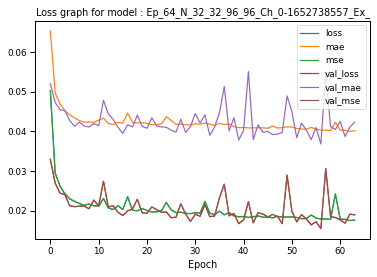

0.015472248196601868

In [13]:
Model_id = 1652738557
m = {'Epoch' : 64, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'index' : 0, 'Uniq_id' : Model_id}
A = Plotting.Plot_loss_model(save = False, **m)
min(A['val_mse'])

PWD : /home/bouissob/Code
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1653033955_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1652989794_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1652989831_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_64_N_32_32_96_96_Ch_0-1652989885_Ex_
/home/bouissob/Code/Auto_model/COM_NEMO-CNRS/Ocean1_Ocean2_Ocean3_Ocean4/Ep_128_N_128_128_128_128_128_Ch_0-1650362530_Ex_


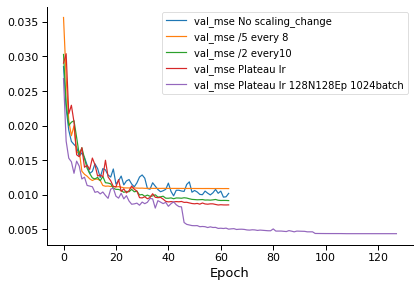

In [3]:
importlib.reload(Plotting)
importlib.reload(Computing_functions)
importlib.reload(Trainings)
Ids = 1652956285
Mod = [{'Ocean' : OcT, 'Uniq_id' : 1653033955 }, {'Ocean' : OcT, 'Uniq_id': 1652989794}, {'Ocean' : OcT, 'Uniq_id' : 1652989831}, 
      {'Ocean' : OcT, 'Uniq_id' : 1652989885}, {'Ocean' : OcT, 'Uniq_id' :  1650362530}]
Plotting.Plot_Loss_against_loss(Mods = Mod, Desired_comparaison=['val_mse'], label = ['No scaling_change', '/5 every 8', 
                                '/2 every10', 'Plateau lr', 'Plateau lr 128N128Ep 1024batch'])

Overfit quest graph loss 2 with lr schedule

Ep_64_N_32_32_96_96_Ch_0-1652949724_Ex_


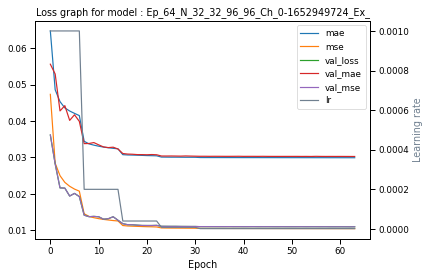

0.010999754071235657

In [14]:
Model_id = 1652949724
m = {'Epoch' : 64, 'Neur' : '32_32_96_96', 'Ocean' : OcT, 'index' : 0, 'Uniq_id' : Model_id}
A = Plotting.Plot_loss_model(save = False, **m, Second_axis = ['lr'], Forbid_key = ['loss'])
min(A['val_mse'])